In [1]:
import nltk
nltk.download('brown')
nltk.download('wordnet')
from nltk.corpus import brown
from nltk.corpus import wordnet as wn
import pandas as pd
import networkx as nx
from nltk.metrics import edit_distance
from nltk.metrics import jaccard_distance
nltk.download('omw-1.4')


[nltk_data] Downloading package brown to
[nltk_data]     /Users/jamescarney/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jamescarney/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jamescarney/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Distance metrics in NLP

Many problems in NLP require use to be able to compute how close one string or document is to another, with 'close' applying to both the composition and the meanings of the documents or strings in question. There are many measures of similarity available, but we will look at two common ones: Levenshtein (or edit) distance and Jaccard distance. These can be accessed using the `NLTK` library for NLP, but we will fist look at the ideas behind them.


## Levenshtein distance

Any string can be turned into another string by inserting, deleting, or substituting characters. The Levenshtein distance between two strings counts the minimum number of edits needed to do this. Like all distance metrics, Levenshtein distance satisfies three rules:

1. *Reflexivity*: If the distance between two points is zero, the points are identical.
$$d(x,y) = 0 \implies x = y$$
2. *Non-negativity*: All distances between points are greater than or equal to zero.
$$d(x,y)\geq 0$$
3. *Symmetry*: The distance between point and point y is equal to the distance between point y and point x.
$$d(x,y) = d(y,x)$$
4. *The triangle inequality*: For three points $x$, $y$, and $z$, the sum of any two distances distances must be greater than the remaining third distance.
$$d(z,y) \leq d(x,y) + d(x,z)$$




In [2]:
edit_distance('stalactite', 'dendrite')

7

To see how Levenshtein distance works in practice, let's compare two words: DENDRITE and STALACTITE. 
    
$$\begin{bmatrix}S & T & A & L & A & C & T & I & T & E \\D & E & N & D & R & \: & \: & I & T & E\end{bmatrix}$$

In [3]:
spell = pd.read_csv('misspellings.csv', names = ['word']) #Loads data

In [4]:
len(spell)

42269

In [5]:
spell = spell.head(500) #Gets selection from data

good = []

bad = []

for i in spell['word']:
    i = str(i)
    if str(i[0]) != '$':
        bad.append(i)
    else:
        good.append(i[1:])

In [6]:
spell

,word
0,$Albert
1,Ab
2,$America
3,Ameraca
4,Amercia
...,...
495,accessability
496,$accessible
497,accesible
498,accessable


In [7]:
len(bad)

390

In [8]:
distances = [] #Calculates edit distances

for i in bad:
    dist = []
    for j in good:
        dist.append(edit_distance(i, j))
    distances.append(dist)

In [9]:
df = pd.DataFrame(distances) # makes a dataframe from the distances

In [10]:
len(good)

110

In [11]:
df.columns = good # gives column names to dataframe

In [12]:
df.index = bad # Sets index to dataframe

In [13]:
df

,Albert,America,American,April,Austrian,Badcock's,Bechuanaland,Botswana,Cambridge,Canada,...,accelerate,accents,accept,acceptable,acceptance,accepted,access,accessibility,accessible,accessing
Ab,4,6,7,4,7,9,12,8,8,6,...,10,7,6,9,10,8,6,12,9,9
Ameraca,5,1,2,5,6,8,10,6,7,5,...,7,7,7,8,7,7,7,12,9,8
Amercia,5,2,3,4,5,8,11,7,7,6,...,8,7,7,9,9,7,7,11,8,7
Ameracan,6,2,1,6,5,8,9,7,7,6,...,8,8,8,8,8,8,8,12,9,8
Apirl,4,5,6,2,6,9,11,8,8,6,...,9,7,6,8,9,7,6,11,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
execpted,7,7,7,7,8,8,10,8,9,8,...,7,7,6,8,8,4,7,12,9,8
acess,5,6,7,5,8,6,11,7,8,5,...,7,3,3,7,7,5,1,8,5,4
accessability,11,11,11,11,11,12,10,11,12,12,...,8,8,8,6,8,9,7,1,5,6
accesible,8,7,7,7,8,8,10,8,7,9,...,5,5,5,3,5,5,4,5,1,4


In [14]:
matches = df.idxmin(axis=1) # Pulls out column names that have the max edit distance

In [15]:
matches

Ab                          Dr
Ameraca                America
Amercia                America
Ameracan              American
Apirl                    April
                     ...      
execpted              accepted
acess                   access
accessability    accessibility
accesible           accessible
accessable          accessible
Length: 390, dtype: object

## Jaccard distance

Jaccard distance derives from a related measure called Jaccard similarity. Jaccard similarity measures how similar two sets are to one another. It is defined as the intersection of the two sets divided by their union:

$$ {J_s}(A,B) = {\vert{A\cap B}\vert \over \vert{A\cup B}\vert}$$


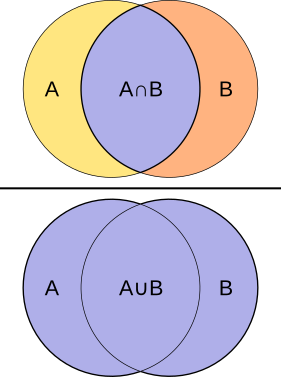

Because the intersection of two identical sets is the same as their union, the maximum value Jaccard similarity can take is $1$ and its minimum value is $0$. This is useful, because it means that if we want to define how different two sets are from each other, we can just subtract the Jaccard similarity from $1$:

$$ {J_d}(A,B) = 1 - {\vert{A\cap B}\vert \over \vert{A\cup B}\vert}$$

Example: 

$$A = \{apple, pear, grape, pomegranate, orange\}$$

$$B = \{strawberry, plum, pear, orange\}$$

$${A\cap B} = \{pear, orange\}$$

$${A\cup B} = \{apple, pear, grape, pomegranate, orange, strawberry, plum\}$$

$$\vert{A\cap B}\vert = 2$$

$$\vert{A\cup B}\vert = 7$$

$${J_d}(A,B) = 1 - {2\over 7}$$

$${J_d}(A,B) = 0.714$$

In [16]:
text_1 = "The quick brown fox jumped over the lazy dogs"
text_2 = "The clever fox was a star performer at the show"
text_3 = "The quick olympic sprinter beat all her lazy competitors"

In [17]:
t1 = set(text_1.split(" "))
t2 = set(text_2.split(" "))
t3 = set(text_3.split(" "))

In [18]:
jaccard_distance(t2,t1)

0.8125

In [19]:
j_distances = []

for i in bad:
    dist = []
    for j in good:
        dist.append(jaccard_distance(set(i), set(j)))
    j_distances.append(dist)

In [20]:
j_distances

[[0.6666666666666666,
  0.875,
  0.8888888888888888,
  0.8333333333333334,
  0.8888888888888888,
  1.0,
  1.0,
  1.0,
  0.9,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8571428571428571,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.75,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.875,
  0.8333333333333334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8333333333333334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8571428571428571,
  0.8888888888888888,
  0.8571428571428571,
  0.8,
  0.8888888888888888,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8571428571428571,
  0.8571428571428571,
  0.9,
  0.875,
  0.8888888888888888,
  0.9,
  0.8571428571428571,
  0.8571428571428571,
  0.875,
  0.8571428571428571,
  0.83333333333

In [21]:
nltk.corpus.brown.fileids()

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10',
 'ca11',
 'ca12',
 'ca13',
 'ca14',
 'ca15',
 'ca16',
 'ca17',
 'ca18',
 'ca19',
 'ca20',
 'ca21',
 'ca22',
 'ca23',
 'ca24',
 'ca25',
 'ca26',
 'ca27',
 'ca28',
 'ca29',
 'ca30',
 'ca31',
 'ca32',
 'ca33',
 'ca34',
 'ca35',
 'ca36',
 'ca37',
 'ca38',
 'ca39',
 'ca40',
 'ca41',
 'ca42',
 'ca43',
 'ca44',
 'cb01',
 'cb02',
 'cb03',
 'cb04',
 'cb05',
 'cb06',
 'cb07',
 'cb08',
 'cb09',
 'cb10',
 'cb11',
 'cb12',
 'cb13',
 'cb14',
 'cb15',
 'cb16',
 'cb17',
 'cb18',
 'cb19',
 'cb20',
 'cb21',
 'cb22',
 'cb23',
 'cb24',
 'cb25',
 'cb26',
 'cb27',
 'cc01',
 'cc02',
 'cc03',
 'cc04',
 'cc05',
 'cc06',
 'cc07',
 'cc08',
 'cc09',
 'cc10',
 'cc11',
 'cc12',
 'cc13',
 'cc14',
 'cc15',
 'cc16',
 'cc17',
 'cd01',
 'cd02',
 'cd03',
 'cd04',
 'cd05',
 'cd06',
 'cd07',
 'cd08',
 'cd09',
 'cd10',
 'cd11',
 'cd12',
 'cd13',
 'cd14',
 'cd15',
 'cd16',
 'cd17',
 'ce01',
 'ce02',
 'ce03',
 'ce04',
 'ce05',
 'ce06',
 

In [22]:
nltk.corpus.brown.words('ca01')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [23]:
bank = wn.synsets('bank')

In [24]:
bank

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]

In [25]:
bank[1].lemma_names()

['depository_financial_institution',
 'bank',
 'banking_concern',
 'banking_company']

In [26]:
words = []

for i in bank:
    words.append([lemma.name() for lemma in i.lemmas()])

In [27]:
bank[-1].lemmas()[0].antonyms()

[Lemma('distrust.v.01.mistrust'), Lemma('distrust.v.01.distrust')]

In [28]:
bank[1].hypernyms()

[Synset('financial_institution.n.01')]

In [29]:
hyp = []

for i in wn.synsets('school'):
    hyp.append(i.hypernyms())

In [30]:
wn.synset('sweet.n.01').path_similarity(wn.synset('dog.n.01'))

0.1111111111111111

In [31]:
wn.synset('sweet.n.01').path_similarity(wn.synset('wolf.n.01'))

0.07142857142857142

In [32]:
wn.synset('wolf.n.01').path_similarity(wn.synset('dog.n.01'))

0.3333333333333333

In [33]:
wn.synset('lollipop.n.01').path_similarity(wn.synset('wolf.n.01'))

0.047619047619047616

In [34]:
wn.synset('cat.n.01').path_similarity(wn.synset('dog.n.01'))

0.2

In [35]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    
    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)
                
    recurse(synset)
    return graph

In [36]:
dog = wn.synset('dog.n.01')

In [41]:
graph = closure_graph(dog,
                      lambda s: s.hypernyms())

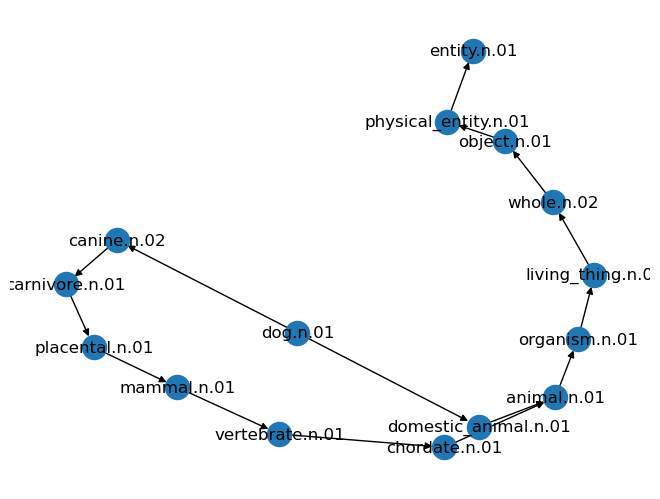

In [44]:
nx.draw(graph, with_labels=True)

In [38]:
hammer = wn.synset('hammer.n.01')

In [39]:
graph = closure_graph(hammer,
                      lambda s: s.hypernyms())

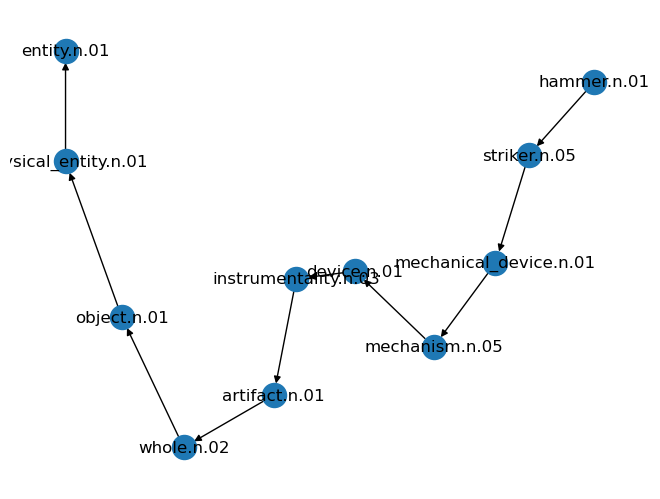

In [40]:
nx.draw(graph, with_labels=True)

In [45]:
import random

In [69]:
names = random.choices(brown.fileids(), k = 100)

In [70]:
files = [brown.words(i) for i in names]

In [71]:
jd = [[] for x in range(len(files))]

for i in range(len(files)):
    for j in range(len(files)):
        jd[i].append(jaccard_distance(set(files[i]), set(files[j])))

In [72]:
jd_df = pd.DataFrame(jd, columns = names, index = names)

In [ ]:
jd_df

In [76]:
import seaborn as sns
sns.set()

In [ ]:
sns.heatmap(jd_df)